### Packages

In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import joblib
import numpy as np
import csv
import string
import collections
import random
import pandas as pd
import plotnine as p9
import json

# Load Data

In [2]:
df = pd.read_csv('data/iowa_algorithm.csv')
df.columns.tolist()

['store',
 'month',
 'city',
 'liter',
 'gross_profit',
 's_convenience_store',
 's_distillery_brewery',
 's_gas_station',
 's_general_store',
 's_grocery_store',
 's_liquor_store_bar',
 's_other',
 's_pharmacy',
 's_unknown',
 'c_adair',
 'c_adams',
 'c_allamakee',
 'c_appanoose',
 'c_audubon',
 'c_benton',
 'c_black hawk',
 'c_boone',
 'c_bremer',
 'c_buchanan',
 'c_buena vista',
 'c_butler',
 'c_calhoun',
 'c_carroll',
 'c_cass',
 'c_cedar',
 'c_cerro gordo',
 'c_cherokee',
 'c_chickasaw',
 'c_clarke',
 'c_clay',
 'c_clayton',
 'c_clinton',
 'c_crawford',
 'c_dallas',
 'c_davis',
 'c_decatur',
 'c_delaware',
 'c_des moines',
 'c_dickinson',
 'c_dubuque',
 'c_emmet',
 'c_fayette',
 'c_floyd',
 'c_franklin',
 'c_fremont',
 'c_greene',
 'c_grundy',
 'c_guthrie',
 'c_hamilton',
 'c_hancock',
 'c_hardin',
 'c_harrison',
 'c_henry',
 'c_howard',
 'c_humboldt',
 'c_ida',
 'c_iowa',
 'c_jackson',
 'c_jasper',
 'c_jefferson',
 'c_johnson',
 'c_jones',
 'c_keokuk',
 'c_kossuth',
 'c_lee',
 'c

In [3]:
X = df.drop(columns=[
    'store', 'city', 'liter', 'gross_profit'
])
X

,month,s_convenience_store,s_distillery_brewery,s_gas_station,s_general_store,s_grocery_store,s_liquor_store_bar,s_other,s_pharmacy,s_unknown,...,l_single_malt_scotch,l_special_order_items,l_spiced_rum,l_straight_bourbon_whiskies,l_straight_rye_whiskies,l_temporary_specialty_packages,l_tennessee_whiskies,l_triple_sec,l_whiskey_liqueur,l_white_rum
0,1,0,0,0,0,0,1,0,0,0,...,0.0,0.00,4.300,8.150,0.00,5.50,5.425,0.0,2.250,1.75
1,2,0,0,0,0,0,1,0,0,0,...,1.5,0.00,5.250,9.000,0.00,2.50,0.750,0.0,2.500,0.00
2,3,0,0,0,0,0,1,0,0,0,...,0.0,0.00,5.250,5.750,0.75,2.50,1.750,1.0,4.250,0.00
3,4,0,0,0,0,0,1,0,0,0,...,0.0,0.00,5.250,6.000,1.00,2.50,1.750,0.0,0.750,1.75
4,5,0,0,0,0,0,1,0,0,0,...,0.0,1.75,2.800,8.625,0.75,4.00,4.050,1.0,1.750,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23090,7,0,0,1,0,0,0,0,0,0,...,0.0,0.00,2.875,0.050,0.00,0.00,0.000,0.0,5.775,0.00
23091,9,0,0,1,0,0,0,0,0,0,...,0.0,0.00,0.000,0.000,0.00,0.00,0.000,0.0,1.800,0.00
23092,10,0,0,1,0,0,0,0,0,0,...,0.0,0.00,0.000,0.000,0.00,0.75,0.000,0.0,0.000,0.00
23093,11,0,0,1,0,0,0,0,0,0,...,0.0,0.00,0.375,0.750,0.00,0.00,0.000,0.0,0.000,0.00


In [4]:
X.columns.tolist()

['month',
 's_convenience_store',
 's_distillery_brewery',
 's_gas_station',
 's_general_store',
 's_grocery_store',
 's_liquor_store_bar',
 's_other',
 's_pharmacy',
 's_unknown',
 'c_adair',
 'c_adams',
 'c_allamakee',
 'c_appanoose',
 'c_audubon',
 'c_benton',
 'c_black hawk',
 'c_boone',
 'c_bremer',
 'c_buchanan',
 'c_buena vista',
 'c_butler',
 'c_calhoun',
 'c_carroll',
 'c_cass',
 'c_cedar',
 'c_cerro gordo',
 'c_cherokee',
 'c_chickasaw',
 'c_clarke',
 'c_clay',
 'c_clayton',
 'c_clinton',
 'c_crawford',
 'c_dallas',
 'c_davis',
 'c_decatur',
 'c_delaware',
 'c_des moines',
 'c_dickinson',
 'c_dubuque',
 'c_emmet',
 'c_fayette',
 'c_floyd',
 'c_franklin',
 'c_fremont',
 'c_greene',
 'c_grundy',
 'c_guthrie',
 'c_hamilton',
 'c_hancock',
 'c_hardin',
 'c_harrison',
 'c_henry',
 'c_howard',
 'c_humboldt',
 'c_ida',
 'c_iowa',
 'c_jackson',
 'c_jasper',
 'c_jefferson',
 'c_johnson',
 'c_jones',
 'c_keokuk',
 'c_kossuth',
 'c_lee',
 'c_linn',
 'c_louisa',
 'c_lucas',
 'c_lyon',
 '

In [5]:
y = df['gross_profit']
y

0        4499.84
1        4598.18
2        4840.74
3        3828.55
4        4691.36
          ...   
23090    1773.04
23091     626.34
23092     653.52
23093     642.18
23094     691.86
Name: gross_profit, Length: 23095, dtype: float64

In [6]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=32)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.176, random_state=123)

# Training & Validation

## Number of Trees: 30

In [7]:
rmse_list_30 = []
for depth in [3, 5, 7, 10, 15, 20, 25]:
    forest = RandomForestRegressor(n_estimators=30, max_depth=depth, random_state=32)
    forest.fit(X_train, y_train)
    y_val_pred = forest.predict(X_val)
    mse = mean_squared_error(y_val, y_val_pred)
    rmse = np.sqrt(mse)
    rmse_list_30.append(rmse)
    print(f"Depth={depth}, RMSE={rmse:.2f}")

Depth=3, RMSE=6730.46
Depth=5, RMSE=5922.27
Depth=7, RMSE=5350.01
Depth=10, RMSE=4890.33
Depth=15, RMSE=4851.19
Depth=20, RMSE=4921.68
Depth=25, RMSE=4885.12


## Number of Trees: 50

In [8]:
rmse_list_50 = []
for depth in [3, 5, 7, 10, 15, 20, 25]:
    forest = RandomForestRegressor(n_estimators=50, max_depth=depth, random_state=32)
    forest.fit(X_train, y_train)
    y_val_pred = forest.predict(X_val)
    mse = mean_squared_error(y_val, y_val_pred)
    rmse = np.sqrt(mse)
    rmse_list_50.append(rmse)
    print(f"Depth={depth}, RMSE={rmse:.2f}")

Depth=3, RMSE=6558.96
Depth=5, RMSE=5628.94
Depth=7, RMSE=5134.04
Depth=10, RMSE=4820.00
Depth=15, RMSE=4697.76
Depth=20, RMSE=4742.00
Depth=25, RMSE=4766.80


## Number of Trees: 70

In [9]:
rmse_list_70 = []
for depth in [3, 5, 7, 10, 15, 20, 25]:
    forest = RandomForestRegressor(n_estimators=70, max_depth=depth, random_state=32)
    forest.fit(X_train, y_train)
    y_val_pred = forest.predict(X_val)
    mse = mean_squared_error(y_val, y_val_pred)
    rmse = np.sqrt(mse)
    rmse_list_70.append(rmse)
    print(f"Depth={depth}, RMSE={rmse:.2f}")

Depth=3, RMSE=6579.79
Depth=5, RMSE=5654.06
Depth=7, RMSE=5158.84
Depth=10, RMSE=4859.08
Depth=15, RMSE=4696.63
Depth=20, RMSE=4732.64
Depth=25, RMSE=4760.77


## Number of Trees: 100

In [10]:
rmse_list_100 = []
for depth in [3, 5, 7, 10, 15, 20, 25]:
    forest = RandomForestRegressor(n_estimators=100, max_depth=depth, random_state=32)
    forest.fit(X_train, y_train)
    y_val_pred = forest.predict(X_val)
    mse = mean_squared_error(y_val, y_val_pred)
    rmse = np.sqrt(mse)
    rmse_list_100.append(rmse)
    print(f"Depth={depth}, RMSE={rmse:.2f}")

Depth=3, RMSE=6500.16
Depth=5, RMSE=5555.88
Depth=7, RMSE=5034.85
Depth=10, RMSE=4725.40
Depth=15, RMSE=4570.25
Depth=20, RMSE=4633.20
Depth=25, RMSE=4620.17


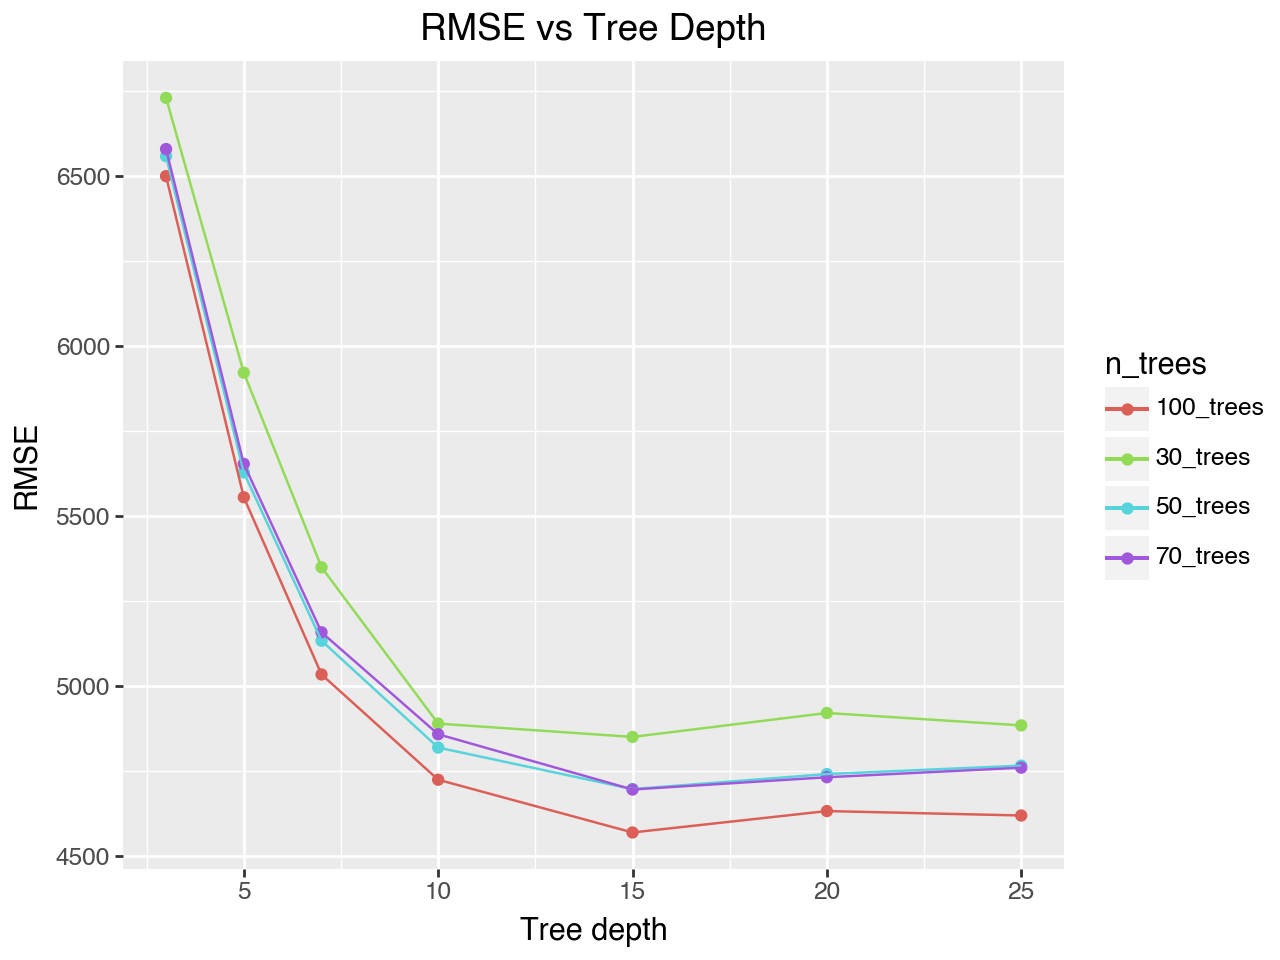

In [11]:
df_rmse = pd.DataFrame({
    'depth': [3, 5, 7, 10, 15, 20, 25],
    '30_trees': rmse_list_30,
    '50_trees': rmse_list_50,
    '70_trees': rmse_list_70,
    '100_trees': rmse_list_100,
})
df_rmse_long = pd.melt(df_rmse,
                       id_vars='depth',
                       var_name='n_trees',
                       value_name='rmse')
df_rmse_long.to_csv('table/rmse.csv', index=False)
plot = (
    p9.ggplot(df_rmse_long, p9.aes(x='depth', y='rmse', color='n_trees')) +
    p9.geom_point() +
    p9.geom_line() +
    p9.labs(title='RMSE vs Tree Depth',
            x='Tree depth',
            y='RMSE')
)
plot

# Test

In [7]:
forest_test = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=100)
forest_test.fit(X_train, y_train)
joblib.dump(forest_test, "table/forest_model.pkl")
prediction = forest_test.predict(X_test)
prediction

array([10798.96599505,  1487.19542941,  2546.49841218, ...,
        3105.45096981,  5777.12866872,   909.82587799], shape=(3465,))

In [24]:
df_importance = pd.DataFrame({
    'feat': X.columns,
    'importance': list(forest_test.feature_importances_)
})
df_importance = df_importance.reset_index(drop=True)
df_importance.to_csv('table/feat_importance_algorithm.csv', index=False)
# df_importance_dict = df_importance.to_dict(orient='records')
# with open('table/feat_importance.json', 'w') as f:
#     json.dump(df_importance_dict, f, indent=2)

In [25]:
rmse_test = np.sqrt(mean_squared_error(y_test, prediction))
print(f"RMSE: {rmse_test:.2f}")

RMSE: 4672.04


In [15]:
df['gross_profit'].describe()

count     23095.000000
mean       6462.534688
std       17846.468086
min          10.750000
25%        1329.800000
50%        2424.220000
75%        5501.125000
max      499690.940000
Name: gross_profit, dtype: float64

In [26]:
summary = df['gross_profit'].describe()
with open('table/gross_profit_summary_liquor_type.json', 'w') as f:
    json.dump(summary.to_dict(), f, indent=2)

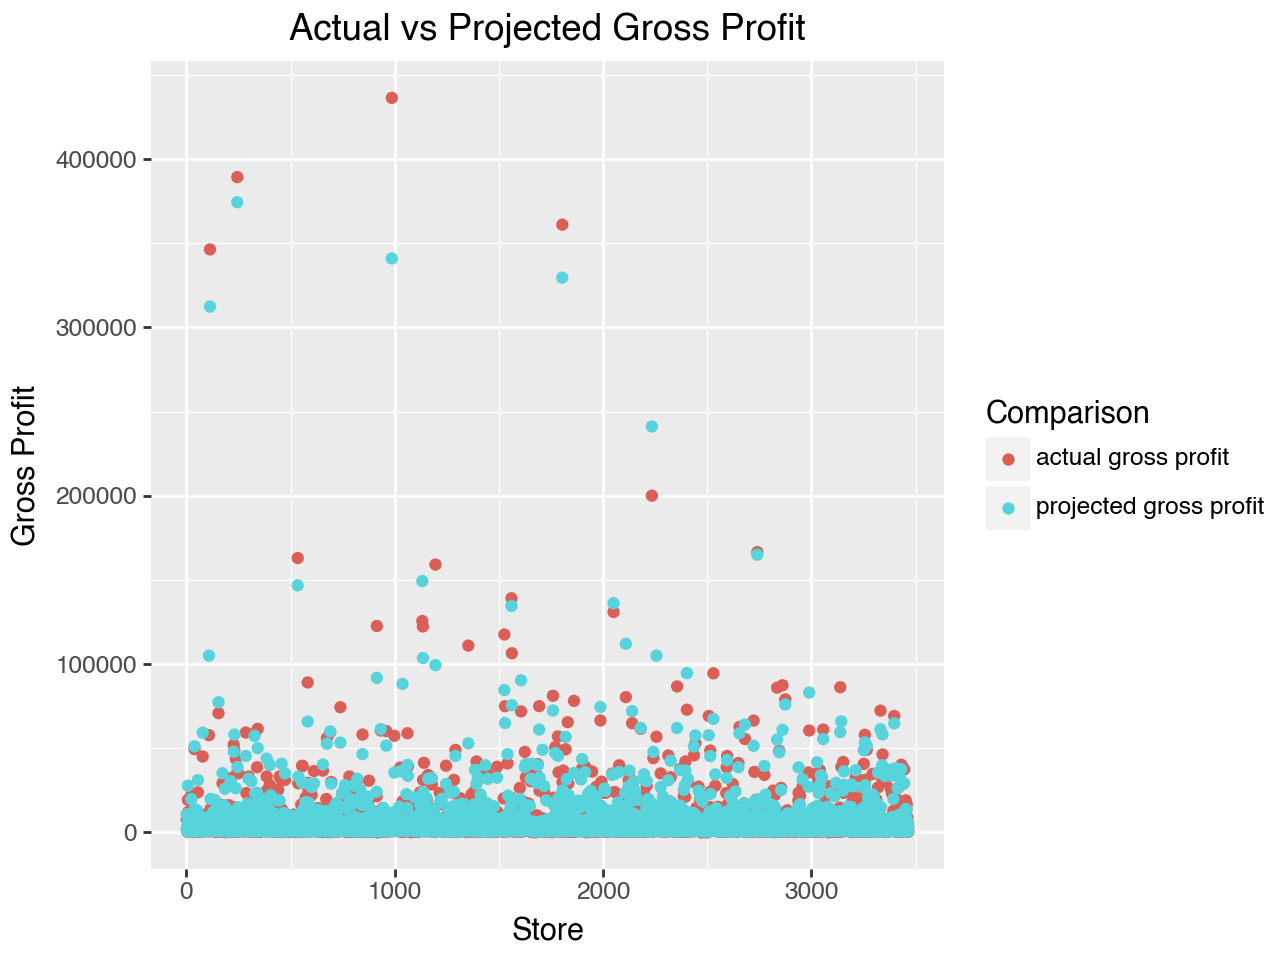

In [27]:
import pandas as pd
import plotnine as p9

df_diff = pd.DataFrame({
    'store': range(1, 3466),
    'actual gross profit': y_test,
    'projected gross profit': prediction
})

df_diff_long = pd.melt(
    df_diff,
    id_vars='store',
    var_name='comparison',
    value_name='gross_profit'
)

df_diff_long.to_csv('table/diff_actu_predi.csv', index=False)

plot = (
    p9.ggplot(df_diff_long, p9.aes(x='store', y='gross_profit', color='comparison')) +
    p9.geom_point() +
    p9.labs(title='Actual vs Projected Gross Profit',
            x='Store',
            y='Gross Profit',
            color='Comparison')
)
plot